In [2]:
from langgraph.graph import StateGraph,START,END
from typing_extensions import TypedDict

In [5]:
# define state
class BMIstate(TypedDict):
    weight_kg:float
    height:float
    bmi:float

In [9]:
def bmi_calculator(state:BMIstate) -> BMIstate:

    bmi = state["weight_kg"] / (state["height"] ** 2)
    state["bmi"] = round(bmi, 2)
    return state

In [13]:
graph = StateGraph(BMIstate)

graph.add_node("bmi_calculator", bmi_calculator)

graph.add_edge(START, "bmi_calculator")
graph.add_edge("bmi_calculator", END)


workflow=graph.compile()

In [15]:
initial_state = {"weight_kg": 70, "height": 1.75}
final_state = workflow.invoke(initial_state)

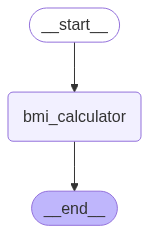

In [17]:
from IPython.display import Image

Image(data=workflow.get_graph().draw_mermaid_png())


In [11]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    equation:str
    disciminant: float
    results: str

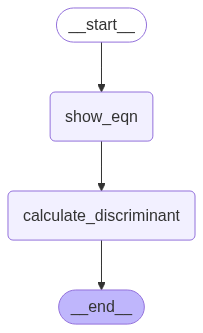

In [12]:
graph=StateGraph(QuadState)
graph.add_node('show_eqn',lambda state: {**state, "equation": f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"})
graph.add_node("calculate_discriminant", lambda state: {**state, "discriminant": state["b"]**2 - 4*state["a"]*state["c"]})

graph.add_edge(START, "show_eqn")
graph.add_edge("show_eqn", "calculate_discriminant")    
graph.add_edge("calculate_discriminant", END)


workflow=graph.compile()
workflow

In [13]:
initial_state={
    'a': 4,
    'b': 5,
    'c': 6,
    'equation': "",
    'discriminant': 0.0,
    'results': ''
}
workflow.invoke(initial_state)

{'a': 4, 'b': 5, 'c': 6, 'equation': '4x^2 + 5x + 6 = 0', 'results': ''}